In [35]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from numpy import sqrt
from sklearn.datasets import fetch_olivetti_faces

# Check if the eigenvalues and eigenvectors are already saved
if os.path.exists('eigenvalues.npy') and os.path.exists('eigenvectors.npy') and os.path.exists('featuresMean.npy'):
    eigenvalues = np.load('eigenvalues.npy')
    eigenvectors = np.load('eigenvectors.npy')
    featuresMean = np.load('featuresMean.npy')
    # Fetch images only for zero mean centering
    images2 = fetch_olivetti_faces().images
    images = fetch_olivetti_faces().images
    originalImageEmbeded = np.resize(images, (len(images), images.shape[-1] * images.shape[-1]))
    zeroMeancenteredImages = originalImageEmbeded - featuresMean
    print("getting the saved data")

else:
    # Fetch images and perform PCA computation
    print("processing")
    images = fetch_olivetti_faces().images
    originalImageEmbeded = np.resize(images, (len(images), images.shape[-1] * images.shape[-1]))
    featuresMean = np.mean(originalImageEmbeded, axis=0)
    zeroMeancenteredImages = originalImageEmbeded - featuresMean

    cov_mat = zeroMeancenteredImages @ zeroMeancenteredImages.T

    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenfaces = zeroMeancenteredImages.T @ eigenvectors
    eigenfaces = eigenfaces.T / np.sqrt((eigenfaces.T ** 2).sum(axis=1, keepdims=True))

    # Save the eigenvalues and eigenvectors
    np.save('eigenvalues.npy', eigenvalues)
    np.save('eigenvectors.npy', eigenvectors)
    np.save('featuresMean.npy', featuresMean)

# Continue with the rest of your code
eigenfaces = zeroMeancenteredImages.T @ eigenvectors
eigenfaces = eigenfaces.T / np.sqrt((eigenfaces.T ** 2).sum(axis=1, keepdims=True))

def showImgs(imgs, i_imgs=[0]):
    n = sqrt(len(i_imgs))
    m = n
    p = 1
    if n != int(n):
        n = int(n)
        m = n + 1

    print("n, m", n, m)
    fig = plt.figure(dpi=2000)
    for i in i_imgs:
        fig.add_subplot(int(n), int(m), p)
        plt.imshow(imgs[i], cmap='gray')
        plt.axis('off')
        p += 1
    plt.show()

def PCAPrecentage(totalVariancePrecentage):
    cumulatorVariance = 0
    
    for i, ratio in enumerate(variancePrecentage):
        cumulatorVariance += ratio
        if cumulatorVariance >= totalVariancePrecentage:
            return i + 1

images = np.array([eigenfaces[i, :].reshape(64, 64) for i in range(eigenfaces.shape[0])])

showImgs(images, range(0,100))

total = sum(eigenvalues)

variancePrecentage = [(i / total) * 50 for i in eigenvalues]



image=np.resize(images2[70,:,:],(64 * 64))-featuresMean

# Input number is the percentage wanted by the user
componentsLastIndex = PCAPrecentage(90)



getting the saved data
n, m 10.0 10.0


getting the saved data


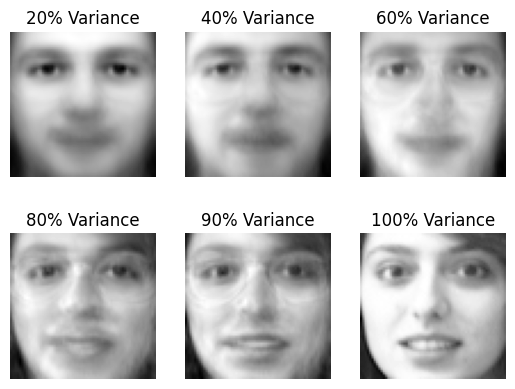

In [72]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from numpy import sqrt
from sklearn.datasets import fetch_olivetti_faces

# Check if the eigenvalues and eigenvectors are already saved
if os.path.exists('eigenvalues.npy') and os.path.exists('eigenvectors.npy') and os.path.exists('featuresMean.npy'):
    eigenvalues = np.load('eigenvalues.npy')
    eigenvectors = np.load('eigenvectors.npy')
    featuresMean = np.load('featuresMean.npy')
    # Fetch images only for zero mean centering
    images2 = fetch_olivetti_faces().images
    images = fetch_olivetti_faces().images
    originalImageEmbeded = np.resize(images, (len(images), images.shape[-1] * images.shape[-1]))
    zeroMeancenteredImages = originalImageEmbeded - featuresMean
    print("getting the saved data")

else:
    # Fetch images and perform PCA computation
    print("processing")
    images = fetch_olivetti_faces().images
    originalImageEmbeded = np.resize(images, (len(images), images.shape[-1] * images.shape[-1]))
    featuresMean = np.mean(originalImageEmbeded, axis=0)
    zeroMeancenteredImages = originalImageEmbeded - featuresMean

    cov_mat = zeroMeancenteredImages @ zeroMeancenteredImages.T

    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenfaces = zeroMeancenteredImages.T @ eigenvectors
    eigenfaces = eigenfaces.T / np.sqrt((eigenfaces.T ** 2).sum(axis=1, keepdims=True))

    # Save the eigenvalues and eigenvectors
    np.save('eigenvalues.npy', eigenvalues)
    np.save('eigenvectors.npy', eigenvectors)
    np.save('featuresMean.npy', featuresMean)

# Continue with the rest of your code
eigenfaces = zeroMeancenteredImages.T @ eigenvectors
eigenfaces = eigenfaces.T / np.sqrt((eigenfaces.T ** 2).sum(axis=1, keepdims=True))

def showImgs(imgs, i_imgs=[0],labels=[]):
    n = sqrt(len(i_imgs))
    m = n
    p = 1
    if n != int(n):
        n = int(n)
        m = n + 1

    fig = plt.figure()
    for i in i_imgs:
        ax=fig.add_subplot(int(n), int(m), p)
        
        plt.imshow(imgs[i], cmap='gray')
        plt.axis('off')
        if len(labels)==len(i_imgs):
            ax.set_title(labels[i])
        p += 1
    plt.show()

def PCAPrecentage(totalVariancePrecentage):
    cumulatorVariance = 0
    
    for i, ratio in enumerate(variancePrecentage):
        cumulatorVariance += ratio
        if cumulatorVariance >= totalVariancePrecentage:
            return i + 1

images = np.array([eigenfaces[i, :].reshape(64, 64) for i in range(eigenfaces.shape[0])])


total = sum(eigenvalues)

variancePrecentage = [(i / total) * 100 for i in eigenvalues]


####images2[70,:,:] is the inputimage input image

image=np.resize(images2[70,:,:],(64 * 64))-featuresMean

images=[
    

    (np.dot(eigenfaces.T[:, 0:PCAPrecentage(20)], np.dot(image, eigenfaces.T[:, 0:PCAPrecentage(20)])) + featuresMean).reshape(64, 64), 
    (np.dot(eigenfaces.T[:, 0:PCAPrecentage(40)], np.dot(image, eigenfaces.T[:, 0:PCAPrecentage(40)])) + featuresMean).reshape(64, 64), 
    (np.dot(eigenfaces.T[:, 0:PCAPrecentage(60)], np.dot(image, eigenfaces.T[:, 0:PCAPrecentage(60)])) + featuresMean).reshape(64, 64), 
    (np.dot(eigenfaces.T[:, 0:PCAPrecentage(80)], np.dot(image, eigenfaces.T[:, 0:PCAPrecentage(80)])) + featuresMean).reshape(64, 64), 
    (np.dot(eigenfaces.T[:, 0:PCAPrecentage(90)], np.dot(image, eigenfaces.T[:, 0:PCAPrecentage(90)])) + featuresMean).reshape(64, 64), 
    (np.dot(eigenfaces.T[:, 0:PCAPrecentage(100)], np.dot(image, eigenfaces.T[:,0:PCAPrecentage(100)])) + featuresMean).reshape(64, 64),
]
showImgs(images,range(len(images)),['20% Variance','40% Variance','60% Variance','80% Variance','90% Variance','100% Variance'])
